In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import splat
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm

#from popsims.plot_style import  plot_style -->

#plot_style()
%matplotlib inline




Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#sorry for no documentation but you should be able reproduce the datafiles with this notebook

In [3]:
#load standards
splat.initializeStandards(all=True)
ALL_STDS={}

for s in [splat.STDS_DWARF_SPEX, splat.STDS_DSD_SPEX,\
          splat.STDS_ESD_SPEX, splat.STDS_INTG_SPEX,
          splat.STDS_SD_SPEX]:
    ALL_STDS.update(s)
#ALL_STDS

In [4]:
#short names for visually confirmed ugly spectra or if I don't trust the classifyByStandard classification
bad_spectra=np.unique(['J01073875-1314137', 'J01481478+1202447',
            'J02481204+2445141', 'J034325482+31551656', 'J034350565+32031800',
            'J03435925+3202502', 'J03441386+3156539', 'J034426561+32082064',
             'J03442694+3203494', 'J03442694+3203494','J03451604+3205141',
             'J03452212+3205450', 'J03452212+3205450', 'J034445206+32011971',
             'J04123277+1044083','J06211484+6558164', 'J11321822-3018316',
             'J20575592-0050060', 'J19165762+0509021', 'J17461199+50340362',
             'J17224432+6329470', 'J16134550+1708270', 'J15551573-0956055',
             'J15394189-0520428', 'J14351087-2333025', 'J14162409+1348267',
             'J13271521+0759375', 'J130831063+08185225', 'J12414645-2238178',
             'J11240487+3808054','J10492244+01255930', 'J07342571+3006583',
             'J06074213+4550370', 'J04430581-3202089', 'J04364275+1901348',
             'J2320292+412341','J21324036+1029494', 'J21304463-08452049',
             'J2047247+142152', 'J2035203-311008', 'J18000116-1559235',
             'J17461199+50340362','J17343053-1151388','J17224432+6329470',
             'J16545079+3747146', 'J16184503-1321297',
             'J16134550+1708270', 'J15551573-0956055', 'J15394189-0520428',
             'J14351087-2333025', 'J14162409+1348267', 'J10492244+01255930',
             'J07342571+3006583', 'J06022216+6336391', 'J03511847-1149326',
             'J01020186+0355405', 'J11473434+215359', 'J11473434+2153590',
            'J11491231-0153006', 'J11553951-37273499', 'J12414645-2238178',
            'J13081228+6103486','J130831063+08185225', 'J14162409+1348267',
            'J14351087-2333025', 'J15394189-0520428', 'J15551573-0956055',
            'J16134550+1708270',  'J16545079+3747146', 
            'J17224432+6329470', 'J17343053-1151388','J19165762+0509021',
            'J2035203-311008', 'J2047247+142152', 'J20571538+1715154', \
             'J20575592-0050060',  'J2320292+412341',
            'J05021345+1442367', 'J2047247+142152', 'J20571538+1715154',
            'J11553951-37273499', 'J16452211-1319516', 'J15551573-0956055',\
            'J034358569+32172753', 'J03434789+3217568', 'J034306790+31482047',\
            'J034359080+32142131', 'J034558247+32264756', 'J034433792+31583028',\
            'J03442789+3227189', 'J03452021+3217223', 'J03451307+3220053', 'J155519605-2751207', \
            'J04355143+2249119', 'J034513803+32120981', 'J03443588+3215028', 'J034434704+32155445',\
            'J11463232+0203414', 'J034249194+31501106', 'J0344359+321504',
            'J03444856+3157276', 'J03452871+3204183', 'J03444090+3217191', 'J034535637+31595444',
            'J041535667+28474171', 'J161958279-2832276', 'J03450206+3159341', 'J03451278+3203168',
            'J034516349+32061995', 'J03451689+3206112', 'J03490944+1514360', 'J03552337+1133437',
            'J0344529+320005', 'J155210885-2125372', 'J034452059+31582521', 'J11472421-2040204',
            'J034400471+32043271', 'J03440486+3157393', 'J034403660+32052036', 'J034405766+32000110',
            'J03441934+3156549', 'J03442555+3211307', 'J034428947+32013785','J034431126+32184849',
            'J034434687+32160009', 'J034357219+32013371', 'J03444827+3158170', 'J034336023+31500896',
            'J043250265+24221156', 'J043814861+26113994', 'J03433630+3203435', 'J041858138+28122349',
            'J034328454+32050582', 'J21481633+4003594', 'J03431581+3210455', 'J03443712+3156546',
            'J03431372+3200451', 'J04390101-2353083', 'J16390818+2839015', 'J13080147+3553169',
            'J04312405+1800215', 'J00440339+0228106', 'J03452106+3218178', 'J201203761+67260569'])

#unresolved binary candidates listed in paper + everything in Table 5 to be safe
binary_candidates=np.unique(['J02361794+0048548', 'J093113.09+280228.9',
'J13114227+3629235', 'J13411160-30525049', 'J14532589+1420418',
'J20261584-2943124', 'J02060879+22355930', 'J04272708-1127143',
'J10365305-3441380', 'J10595138-2113082', 'J142227.20+221557.5',
'J16235970-0508114', 'J170725290-0138093', 'J1711457+223204',
'J000649.16-085246.3','J004757.41+154641.4', 'J00521232+0012172',
' J011912.22+240331.6','J000649.16-085246.3', 'J004757.41+154641.4', 'J00521232+0012172',
'J011912.22+240331.6',
'J020529.62+142114.0',
'J02060879+22355930',
'J02361794+0048548',
'J024749.90-163112.6',
'J03202839-0446358',
'J035104.37+481046.8',
'J04272708-1127143',
'J05185995-2828372',
'J07354882+2720167',
'J080531.84+481233.0',
'J090900.73+652527.2',
'J093113.23+280227.1',
'J09490860-1545485',
'J103931.35+325625.5',
'J10595138-2113082',
'J11061197+2754225',
'J120747.17+024424.8',
'J12144089+6316434',
'J13114227+3629235',
'J13153094-2649513',
'J13243559+6358284',
'J13411160-30525049',
'J141530.05+572428.7',
'J142227.20+221557.5',
'J143553.25+112948.6',
'J143945.86+304220.6',
'J14532589+1420418',
'J151114.66+060742.9',
'J151603.03+025928.9',
'J16235970-0508114',
'J17072529-0138093',
'J17114573+2232044',
'J17310140+5310476',
'J17373467+5953434',
'J20261584-2943124',
'J205235.31-160929.8',
'J21265916+7617440',
'J21392676+0220226',
'J222958.30+010217.2',
'J223348.82+002214.0',
'J235618.01+075420.4',
'J232315.39+071931.0'])

In [5]:
def get_designation(s):
    #print (s)
    coord=splat.designationToCoordinate(s)
    return splat.coordinateToDesignation(coord)

In [6]:
def plot_sp_sp(sp, a, shortname, spex_type):
    #plot a spectrum
    std=ALL_STDS[spex_type]
    
    chi, sc=splat.compareSpectra( sp, std)
    std.scale(sc)
    
    a.plot(sp.wave, sp.flux, c='k', linewidth=4, label=shortname)
    a.plot(std.wave, std.flux, c='#7FDBFF', linewidth=2, label='{} STD'.format(spex_type))
    
    xlim=[0.85, 2.4]
    mask= np.logical_and(sp.wave.value>xlim[0], sp.wave.value<xlim[1])
    ylim= [sp.flux[mask].value.min(), sp.flux.value[mask].max()]
    a.set(xlabel='Wave (micron)', ylabel=' Flux', xlim=xlim, ylim=ylim)
    
    a.legend()
    
def get_spectrum(filename):
    try:
        return splat.getSpectrum(filename=filename)[0]
    except:
        return 
    
def get_shortname(des):
    if '+' in des:
        c=des.split('+')
        return c[0][:5]+'+'+c[1][:4]
    if '-' in des:
        c=des.split('-')
        return c[0][:5]+'-'+c[1][:4]
    
def class_by_standard(sp):
    return splat.classifyByStandard(sp, method='kirkpatrick')[0]

In [7]:
%%capture
db= splat.searchLibrary()
spectra= db.DATA_FILE.apply(get_spectrum)

In [8]:
db['SPECTRA']= spectra

In [26]:
db['SPTYPE_BY_STANDARD']=[ class_by_standard(x) for x in tqdm(db.SPECTRA.values)]
db=(db[~db.SPEX_TYPE.isna()]).reset_index(drop=True)

100%|███████████████████████████████████████| 1646/1646 [02:53<00:00,  9.49it/s]


In [27]:
binary_cands_des=[get_designation(x) for x in binary_candidates]

In [28]:
db['FLAG_IS_SPECTRAL_BINARY_CAND']=db.DESIGNATION.isin(binary_cands_des)
db['FLAG_BAD_SPECTRA']= db.DESIGNATION.isin(bad_spectra)
db=db.drop_duplicates(subset='DESIGNATION')

In [31]:
len(bad_spectra), len(db[db.FLAG_BAD_SPECTRA])

(114, 112)

In [32]:
#assert len(db[db.FLAG_BAD_SPECTRA]) == len(bad_spectra)

In [33]:
np.unique(db.SPEX_GRAVITY_CLASSIFICATION.values.astype(str))

array(['FLD-G', 'INT-G', 'VL-G', 'nan'], dtype='<U5')

In [34]:
np.unique(db.NOTE_SP.values.astype(str))

array(['Possible J flux calibration problem', 'nan',
       'poor telluric correction'], dtype='<U35')

In [35]:
np.unique(db.SBINARY.astype(str))

array(['Y', 'nan'], dtype=object)

In [36]:
np.unique(db.METALLICITY_CLASS.astype(str))

array(['d/sd', 'esd', 'nan', 'sd'], dtype=object)

In [37]:
db['CLEAN']= np.logical_and.reduce([~db.FLAG_IS_SPECTRAL_BINARY_CAND,
                                    ~db.FLAG_BAD_SPECTRA,
                                    #db.SPEX_GRAVITY_CLASSIFICATION=='FLD-G',
                                    #db.NOTE.astype(str) =='nan',
                                    db.SBINARY.astype(str)=='nan',
                                    db.METALLICITY_CLASS.astype(str)=='nan'])
                                    

In [38]:
num_types=[splat.typeToNum(x) for x in db.SPTYPE_BY_STANDARD.values]
db=(db.loc[np.argsort(num_types)]).reset_index(drop=True)
#db.SPTYPE_BY_STANDARD[db.CLEAN]

In [39]:
#plot everything in a pdf
def plot_everything(df, filename):
    with PdfPages('/users/caganze/'+filename) as pdf:

        for g in np.array_split(df, int(len(df)/4)):
            

            fig, ax=plt.subplots(ncols=2, nrows=2)
            
            plot_sp_sp(g.SPECTRA.iloc[0], ax[0][0], g.DESIGNATION.iloc[0],  g.SPTYPE_BY_STANDARD.iloc[0] )
            plot_sp_sp(g.SPECTRA.iloc[1], ax[0][1],  g.DESIGNATION.iloc[1], g.SPTYPE_BY_STANDARD.iloc[1] )
            plot_sp_sp(g.SPECTRA.iloc[2], ax[1][0],  g.DESIGNATION.iloc[2], g.SPTYPE_BY_STANDARD.iloc[2])
            plot_sp_sp(g.SPECTRA.iloc[3], ax[1][1],  g.DESIGNATION.iloc[3], g.SPTYPE_BY_STANDARD.iloc[3])
            
            plt.tight_layout()
            pdf.savefig() 
            plt.close()
            


In [40]:
plot_everything(db[db.CLEAN].reset_index(drop=True), filename='clean_spectra.pdf')
plot_everything(db[db.FLAG_BAD_SPECTRA].reset_index(drop=True), filename='bad_spectra.pdf')

In [41]:
import splat.empirical as spe

In [42]:
def get_absolute_mag_j2mass(spt):
    #use pecaut for < spt <16
    if spt <=16:
        return spe.typeToMag(spt, '2MASS J', ref='pecaut2013')
    
    else:
        return spe.typeToMag(spt, '2MASS J', ref='dupuy2012')

In [43]:
get_absolute_mag_j2mass(15)

(9.25, 0.05)

In [44]:
sp=db.SPECTRA.iloc[0]
WAVEGRID=sp.wave[np.logical_and(sp.wave.value >=0.9, sp.wave.value <=2.4)].value
#WAVEGRID

In [45]:
def measure_fluxes(row):
    try:
        sp=row.SPECTRA
        spt=splat.typeToNum(row.SPTYPE_BY_STANDARD)

        #scale
        m, mer= get_absolute_mag_j2mass(spt)
        sp.fluxCalibrate('MKO J',m)

        #measure mags
        j, jerr=splat.filterMag(sp,'MKO J')
        h, herr=splat.filterMag(sp,'MKO H')
        k, kerr=splat.filterMag(sp,'MKO K')
        
        j2, jerr2=splat.filterMag(sp,'2MASS J')
        h2, herr2=splat.filterMag(sp,'2MASS H')
        k2, kerr2=splat.filterMag(sp,'2MASS K')
        #y, yerr=splat.filterMag(sp,'MKO Y')


        #interpolate
        interp_flux = np.interp(WAVEGRID, sp.wave.value, sp.flux.value) 
        intepr_noise= np.interp(WAVEGRID, sp.wave.value, sp.noise.value)

        #measure J-SNR
        jsnr=np.nanmedian(sp.flux[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value\
                 /sp.noise[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value)

        return {'WAVEGRID': WAVEGRID,
               'FLUX': interp_flux,
               'UNCERTAINTY':  intepr_noise,
               'MKO_J': j,
               'MKO_J_ER': jerr,
                'MKO_H': h,
                'MKO_H_ER': herr,
                'J_SNR':jsnr,
                'MKO_KS': k,
               'MKO_KS_ER': kerr,
                '2MASS_J': j2,
               '2MASS_J_ER': jerr2,
                '2MASS_H': h2,
               '2MASS_H_ER': herr2,
                '2MASS_KS': k2,
               '2MASS_KS_ER': kerr2,
              
               }
    except ValueError:
        return {'WAVEGRID': None,
               'FLUX': None,
               'UNCERTAINTY':  None,
               'MKO_J': None,
               'MKO_J_ER': None,
                'MKO_H': None,
                'MKO_H_ER': None,
                'J_SNR': None,
                'MKO_KS': None,
               'MKO_KS_ER': None,
                '2MASS_J': None,
               '2MASS_J_ER': None,
                '2MASS_H': None,
               '2MASS_H_ER': None,
                '2MASS_KS': None,
               '2MASS_KS_ER': None,
              
               }

In [46]:
vals= db.apply(measure_fluxes, axis=1)

In [47]:
vals_df=pd.DataFrame([ x for x in vals])

In [48]:
db_small=db.join(vals_df).drop(columns=['SPECTRA'])

[Text(0.5, 0, 'MKO J-H'), Text(0, 0.5, 'J')]

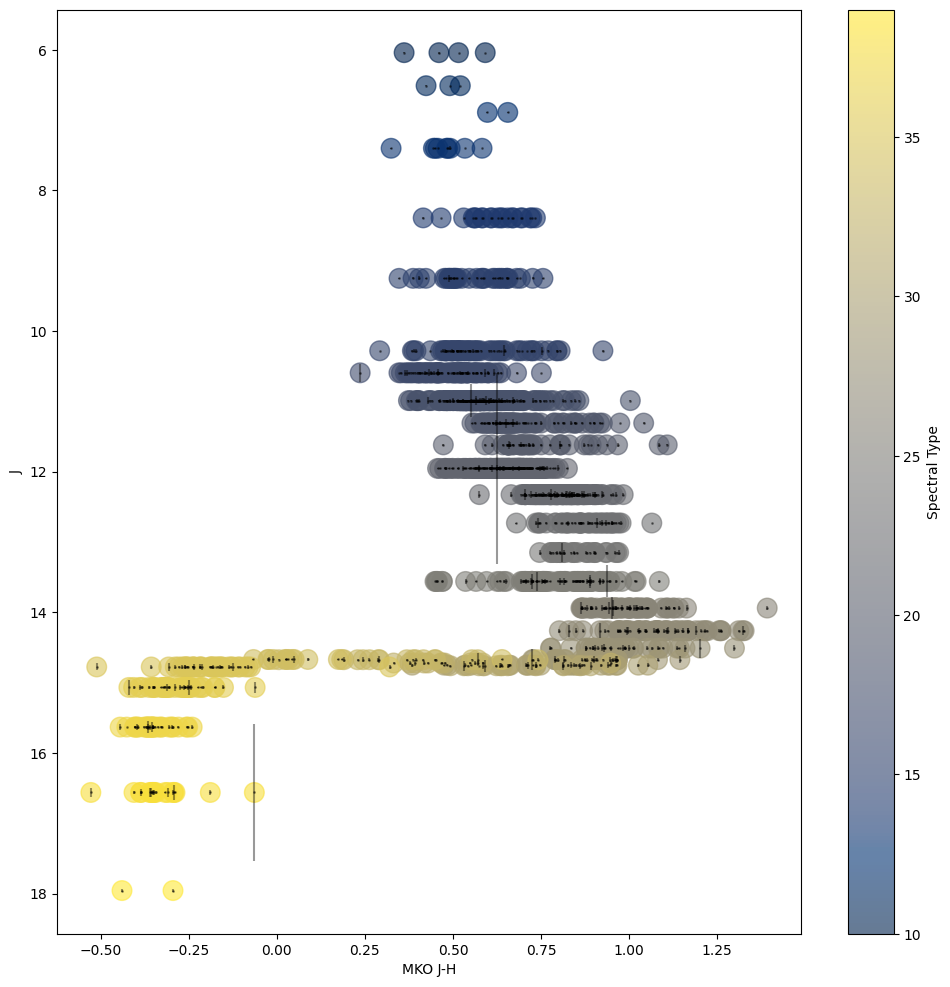

In [49]:
fig, ax=plt.subplots(figsize=(12, 12))


ax.errorbar((db_small.MKO_J-db_small.MKO_H)[db_small.CLEAN], db_small.MKO_J[db_small.CLEAN],ms=1, fmt='o', \
            yerr=db_small.MKO_J_ER[db_small.CLEAN], c='k', alpha=0.4)
c=ax.scatter((db_small.MKO_J-db_small.MKO_H)[db_small.CLEAN], db_small.MKO_J[db_small.CLEAN], \
           c=db_small.SPTYPE_BY_STANDARD.apply(splat.typeToNum)[db_small.CLEAN], s=200,alpha=0.6, cmap='cividis')
plt.colorbar(c, label='Spectral Type')

ax.invert_yaxis()
ax.set(xlabel='MKO J-H', ylabel='J')

In [50]:
np.isscalar('esd')

True

In [51]:
def float_to_empty_string(value):
    if isinstance(value, str):
        return value
    else:
        if np.isnan(value):
            return ''
        else:
            return str(value)
def get_flags(row):
    met= float_to_empty_string(row.METALLICITY_CLASS)
    lumn=  float_to_empty_string(row.LUMINOSITY_CLASS)
    noisy=''
    if row.FLAG_BAD_SPECTRA:
        noisy='noisy'
    sb=''
    if row.FLAG_IS_SPECTRAL_BINARY_CAND:
        sb='sbinary'
    return  met+'_'+lumn+'_'+noisy+'_'+sb

In [52]:
db_small['CLASS']=db_small.apply(get_flags, axis=1)

In [53]:
db_small[['CLASS', 'CLEAN']]

,CLASS,CLEAN
0,___,True
1,___,True
2,esd__noisy_,False
3,___,True
4,___,True
...,...,...
1641,___,True
1642,___,True
1643,___,True
1644,___,True


In [54]:
db_small=db_small.rename(columns={'SPEX_TYPE': 'SPEX_SPT',\
                                  'OPT_TYPE': 'OPT_SPT',\
                                  'NIR_TYPE': 'NIR_SPT',\
                                  'LIT_TYPE': 'LIT_SPT',\
                                  'SPTYPE_BY_STANDARD': 'SPT'})

In [55]:
db_small['SNR']=(db_small.FLUX/db_small.UNCERTAINTY).apply(lambda x: np.nanmedian(x))

In [56]:
cols=['NAME', 'DESIGNATION', 'FLUX', 'UNCERTAINTY','J_SNR','SPT','SPEX_SPT', 'OPT_SPT',\
      'NIR_SPT', 'LIT_SPT', 'CLASS', 'DATA_REFERENCE', 'MKO_J', 'MKO_H', 'MKO_KS',\
      '2MASS_J', '2MASS_H', '2MASS_KS', 'MKO_J_ER', 'MKO_H_ER', 'MKO_KS_ER',\
      '2MASS_J_ER', '2MASS_H_ER', '2MASS_KS_ER', 'WAVEGRID', 'CLEAN']


In [57]:
db_small[cols]

,NAME,DESIGNATION,FLUX,UNCERTAINTY,J_SNR,SPT,SPEX_SPT,OPT_SPT,NIR_SPT,LIT_SPT,...,2MASS_H,2MASS_KS,MKO_J_ER,MKO_H_ER,MKO_KS_ER,2MASS_J_ER,2MASS_H_ER,2MASS_KS_ER,WAVEGRID,CLEAN
0,LSPM J0734+5810,J07340502+5810484,"[1.703971008737426e-08, 1.7167767651926624e-08...","[2.946189681107825e-10, 2.839981860791596e-10,...",83.142639,M0.0,M0.0,NaN,M:,M:,...,5.555240,5.360808,0.013230,0.021939,0.035170,0.011491,0.021176,0.033760,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
1,WISE J183921.35-374431.0,J18392135-3744310,"[1.6583900940910237e-08, 1.672354310811135e-08...","[3.912149663373827e-11, 3.979055985709922e-11,...",581.457947,M0.0,M0.0,NaN,M0,M0,...,5.489314,5.259714,0.002015,0.003038,0.006865,0.001641,0.003206,0.007258,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
2,LHS 217,J06211484+6558164,"[1.6915699067793325e-08, 1.6738857481500954e-0...","[6.82230388662334e-11, 6.66224168643241e-11, 6...",406.650818,M0.0,M0.0,esdM0,esdM:,esdM0,...,5.594553,5.439782,0.002651,0.003196,0.005964,0.002788,0.003448,0.006097,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",False
3,PM J17137-4535,J17134345-4536014,"[1.7414131914668705e-08, 1.7907500376747947e-0...","[1.0127925267676249e-10, 1.1089358919449286e-1...",256.111267,M0.0,M0.0,NaN,sdM0?,sdM0?,...,5.655775,5.511472,0.004308,0.006320,0.012371,0.004027,0.006755,0.010827,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
4,Gliese 270,J07193126+3249482,"[1.6936995662189027e-08, 1.674996727617314e-08...","[1.8588180209452355e-11, 1.8242771540848554e-1...",1258.298950,M0.0,M0.0,M0,M0,M0,...,5.413118,5.249317,0.000897,0.001077,0.001693,0.000879,0.001106,0.001808,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,WISE J050003.04-122343.2,J05000304-1223432,"[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,T8.0,NaN,T8,T8,...,16.769569,17.176120,0.107279,0.438417,0.799908,0.108010,0.421816,1.078247,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
1642,WISE J222623.05+044004.0,J22262305+0440040,"[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,T8.0,NaN,T8.5,T8.5,...,16.950551,16.838668,0.020595,0.086202,0.169386,0.025149,0.070013,0.141694,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
1643,ULAS J102940.52+093514.6,J10294051+0935141,"[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,T8.0,NaN,T8,T8,...,16.876490,16.656473,0.029904,0.136846,0.238533,0.042980,0.142865,0.197560,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True
1644,WISE J004945.61+215120.0,J00494561+2151200,"[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,T8.0,NaN,T8.5,T8.5,...,18.386830,18.285238,0.015764,0.058615,0.149581,0.019333,0.059689,0.130527,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...",True


In [58]:
#'SPT' is the default spectral type from comparison to standards; leave the others in in case we want to use them
#'CLASS' can encompass all the flag keywords as just a set of strings: giant, subdwarf, young, binary, sbinary, noisy, weird, etc.
#For Binaries: we can add _1 and _2 and _12 for primary, secondary, combined parameters [--> we have a function for making binaries]


In [59]:
len(db_small[cols].dropna()), len(db_small)

(212, 1646)

In [60]:
db_small[cols].to_hdf('../../spectral_binaries/data/single_spectra_with_synthphot.h5',key='singles')

[None]

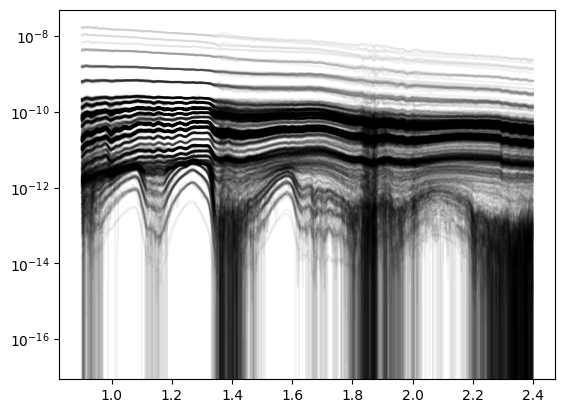

In [61]:
fig, ax=plt.subplots()
for idx, row in db_small[db_small.CLEAN].iterrows():
    try:
        ax.plot(row.WAVEGRID, row.FLUX, color='k', alpha=0.05)
    except:
        pass
ax.set(yscale='log')

<Axes: ylabel='Frequency'>

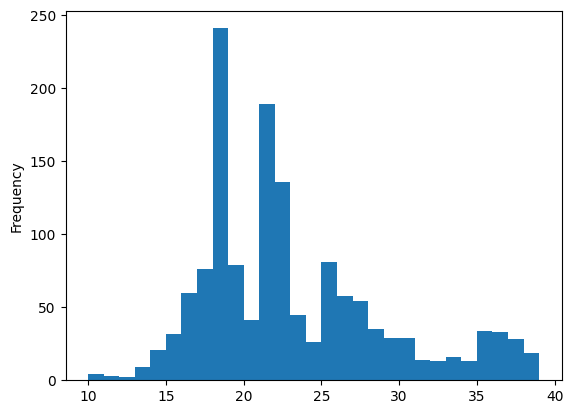

In [62]:
db_small[db_small.CLEAN].SPT.apply(splat.typeToNum).plot(kind='hist', bins=29)

In [63]:
ALL_STDS

{'M0.0': SPEX-PRISM spectrum of Gliese 270 (M0.0),
 'M1.0': SPEX-PRISM spectrum of Gl424 (M1.0),
 'M2.0': SPEX-PRISM spectrum of Gliese 91 (M2.0),
 'M3.0': SPEX-PRISM spectrum of Gl752A (M3.0),
 'M4.0': SPEX-PRISM spectrum of Gliese 213 (M4.0),
 'M5.0': SPEX-PRISM spectrum of Wolf 47 (M5.0),
 'M6.0': SPEX-PRISM spectrum of LHS 1375 (M6.0),
 'M7.0': SPEX-PRISM spectrum of VB 8 (M7.0),
 'M8.0': SPEX-PRISM spectrum of VB 10 (M8.0),
 'M9.0': SPEX-PRISM spectrum of LHS 2924 (M9.0),
 'L0.0': SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0),
 'L1.0': SPEX-PRISM spectrum of 2MASSW J2130446-084520 (L1.0),
 'L2.0': SPEX-PRISM spectrum of Kelu-1 (L2.0),
 'L3.0': SPEX-PRISM spectrum of 2MASSW J1506544+132106 (L3.0),
 'L4.0': SPEX-PRISM spectrum of 2MASS J21580457-1550098 (L4.0),
 'L5.0': SPEX-PRISM spectrum of SDSS J083506.16+195304.4 (L5.0),
 'L6.0': SPEX-PRISM spectrum of 2MASSI J1010148-040649 (L6.0),
 'L7.0': SPEX-PRISM spectrum of 2MASSI J0103320+193536 (L7.0),
 'L8.0': SPEX-PRISM spectrum

In [64]:
#put standards on the same 
std_df=pd.DataFrame()
std_types=[k for k in ALL_STDS.keys() ]
std_df['SPTYPE_BY_STANDARD']=std_types
std_df['SPECTRA']=[ALL_STDS[k] for k in std_types]

In [65]:
svals= std_df.apply(measure_fluxes, axis=1)
svals_df=pd.DataFrame([ x for x in svals])
std_df_sm=std_df.join(svals_df).drop(columns=['SPECTRA'])

In [66]:
std_df_sm['NAME']=[ALL_STDS[k].name.split(' (')[0] for k in std_types]

In [67]:
std_df_sm=std_df_sm.rename(columns={'SPTYPE_BY_STANDARD': 'SPT'})

In [68]:
std_df_sm

,SPT,WAVEGRID,FLUX,UNCERTAINTY,MKO_J,MKO_J_ER,MKO_H,MKO_H_ER,J_SNR,MKO_KS,MKO_KS_ER,2MASS_J,2MASS_J_ER,2MASS_H,2MASS_H_ER,2MASS_KS,2MASS_KS_ER,NAME
0,M0.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.693699729345396e-08, 1.674996905252998e-08,...","[1.8588180492834988e-11, 1.8242771540848554e-1...",6.040000,0.000867,5.448437,0.000986,1258.299072,5.248525,0.001659,6.060210,0.000926,5.413118,0.001078,5.249317,0.001889,Gliese 270
1,M1.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.0798358929239209e-08, 1.0769144400373336e-0...","[1.2433949167617927e-11, 1.2242128212825374e-1...",6.510000,0.000895,5.967299,0.000999,1367.780151,5.732021,0.001762,6.538765,0.000720,5.930899,0.000971,5.741880,0.001957,Gl424
2,M2.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[7.0493637323014866e-09, 7.084528748539476e-09...","[5.3961947679438245e-11, 5.396616742525531e-11...",6.890000,0.004226,6.292275,0.001379,235.883255,6.056528,0.004625,6.915614,0.004360,6.254524,0.001384,6.058993,0.004349,Gliese 91
3,M3.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[4.467550135283016e-09, 4.491114803830974e-09,...","[6.591975777483465e-12, 6.536784599918901e-12,...",7.400000,0.000913,6.866451,0.000784,1199.193359,6.626495,0.001089,7.423497,0.000888,6.830582,0.000826,6.633410,0.001093,Gl752A
4,M4.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.53943726228554e-09, 1.5392817813970799e-09,...","[2.0141469650340918e-12, 1.9983935212353536e-1...",8.390000,0.000486,7.825830,0.000583,1968.439453,7.525251,0.000994,8.419244,0.000538,7.787696,0.000464,7.535269,0.001028,Gliese 213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,sdM8.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.3720963143454557e-10, 1.3767923016809304e-1...","[2.894979234229038e-12, 2.713793382352199e-12,...",10.988594,0.015628,10.682555,0.033136,66.932594,10.476379,0.052548,11.028448,0.015982,10.641695,0.032142,10.486772,0.057121,2MASS J01423153+0523285
58,sdM9.5,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[8.556366178886811e-11, 8.78383979348451e-11, ...","[1.6542813583232247e-12, 6.354659870259401e-13...",11.461809,0.008206,11.276389,0.011540,153.556503,11.189955,0.017077,11.501634,0.008666,11.254988,0.011496,11.206168,0.016865,SSSPM 1013-1356
59,sdL0.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.321868672987857e-11, 5.590721947796425e-11,...","[1.9477017925336494e-12, 1.9129826792535292e-1...",11.618346,0.015790,11.419141,0.028152,67.611664,11.212167,0.052737,11.682738,0.015507,11.376322,0.032141,11.223534,0.047480,WISE J04592121+1540592
60,sdL3.5,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.854691881001475e-11, 1.833009635228614e-11,...","[4.699918522399386e-13, 3.9836072146017795e-13...",12.939254,0.017494,12.947190,0.035621,66.218964,13.041941,0.092730,12.981448,0.014228,12.961012,0.037776,13.067195,0.093286,SDSS J125637.16-022452.2


[Text(0.5, 0, 'MKO J-H'), Text(0, 0.5, 'J'), (-1.0, 2.0)]

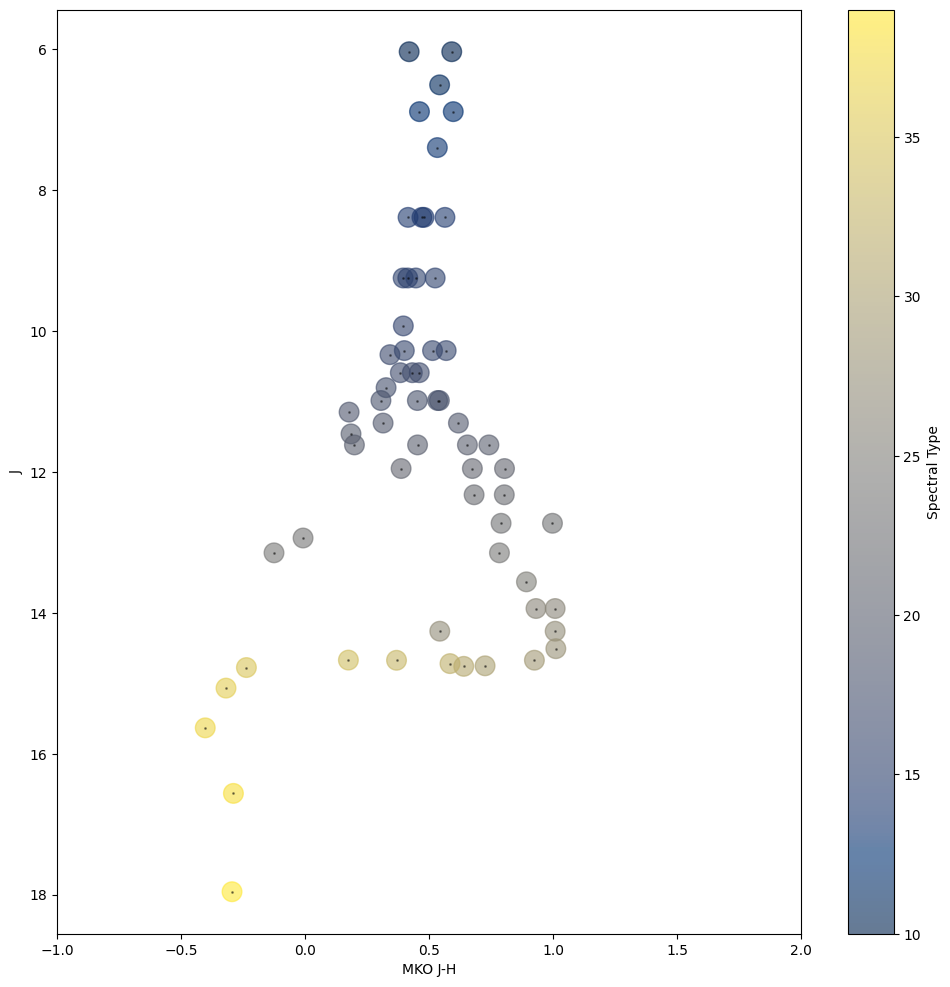

In [69]:
fig, ax=plt.subplots(figsize=(12, 12))


ax.errorbar((std_df_sm.MKO_J-std_df_sm.MKO_H), std_df_sm.MKO_J,ms=1, fmt='o',c='k', alpha=0.4)
c=ax.scatter(std_df_sm.MKO_J-std_df_sm.MKO_H, std_df_sm.MKO_J,\
           c=std_df_sm.SPT.apply(splat.typeToNum), s=200,alpha=0.6, cmap='cividis')
plt.colorbar(c, label='Spectral Type')

ax.invert_yaxis()
ax.set(xlabel='MKO J-H', ylabel='J', xlim=[-1, 2])

[None]

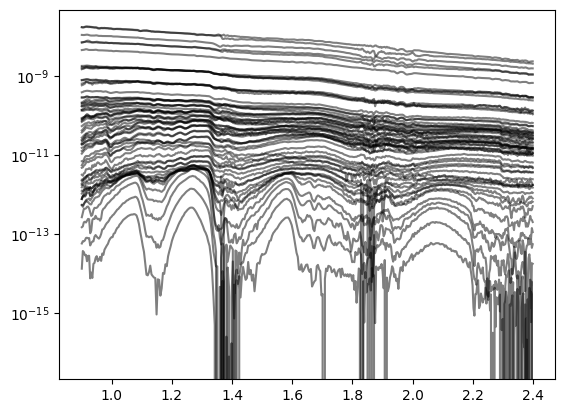

In [70]:
fig, ax=plt.subplots()
for idx, row in std_df_sm.iterrows():
    try:
        ax.plot(row.WAVEGRID, row.FLUX, color='k', alpha=0.5)
    except:
        pass
ax.set(yscale='log')

In [71]:
std_df_sm.to_hdf('../../spectral_binaries/data/standards.h5',key='all')

In [72]:
1/40*40

1.0